In [1]:
import os
import pandas as pd
import numpy as np

data_path = ['../data']
filename = ['X_Y_Sinusoid_Data.csv']
filepath = os.sep.join(data_path + filename)
data = pd.read_csv(filepath)

# Question 1

* Generate approximately 100 equally spaced x data points over the range of 0 to 1. Using these points, calculate the y-data which represents the "ground truth" (the real function) from the equation:  y=sin(2πx)y=sin(2πx) 
* Plot the sparse data (x vs y) and the calculated ("real") data.

,x,y
0,0.038571,0.066391
1,0.166776,1.027483
2,0.183153,1.245302
3,0.187359,1.004781
4,0.243116,1.264121


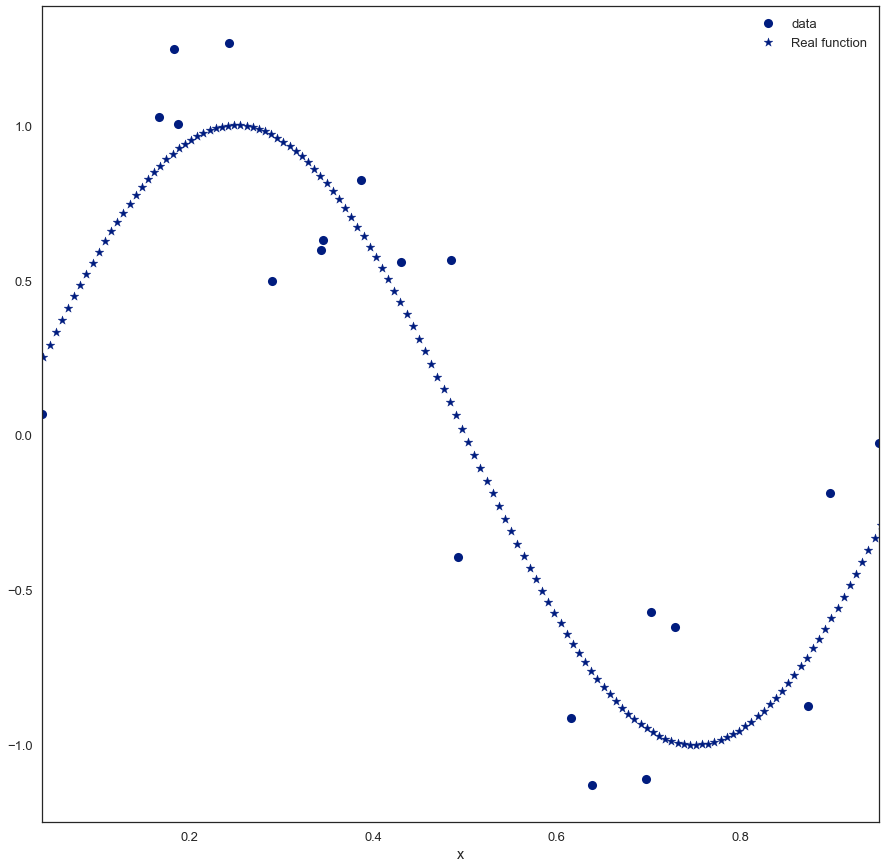

In [2]:
import matplotlib.pyplot as plt
x_train = np.linspace(0,1,150)
y_train = np.sin(2*np.pi*x_train)

import seaborn as sns
sns.set_style('white')
sns.set_context('talk')
sns.set_palette('dark')

%matplotlib inline
plt.rcParams['figure.figsize']=(15,15)
ax = data.set_index('x')['y'].plot(label='data',marker='o',ls='')
ax.scatter(x_train,y_train,label='Real function',marker='*')

ax.legend()
data.head()


# Question 2


* Using the `PolynomialFeatures` class from Scikit-learn's preprocessing library, create 20th order polynomial features.
* Fit this data using linear regression. 
* Plot the resulting predicted value compared to the calculated data.


X Data :   (20, 1)
Y Data :   (20,)


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,0.038571,0.001488,0.000057,0.000002,8.536899e-08,3.292761e-09,1.270048e-10,4.898694e-12,1.889471e-13,...,2.810997e-16,1.084227e-17,4.181965e-19,1.613023e-20,6.221577e-22,2.399720e-23,9.255941e-25,3.570102e-26,1.377021e-27,5.311298e-29
1,1.0,0.166776,0.027814,0.004639,0.000774,1.290245e-04,2.151824e-05,3.588733e-06,5.985158e-07,9.981828e-08,...,2.776381e-09,4.630346e-10,7.722322e-11,1.287901e-11,2.147914e-12,3.582212e-13,5.974282e-14,9.963690e-15,1.661708e-15,2.771336e-16


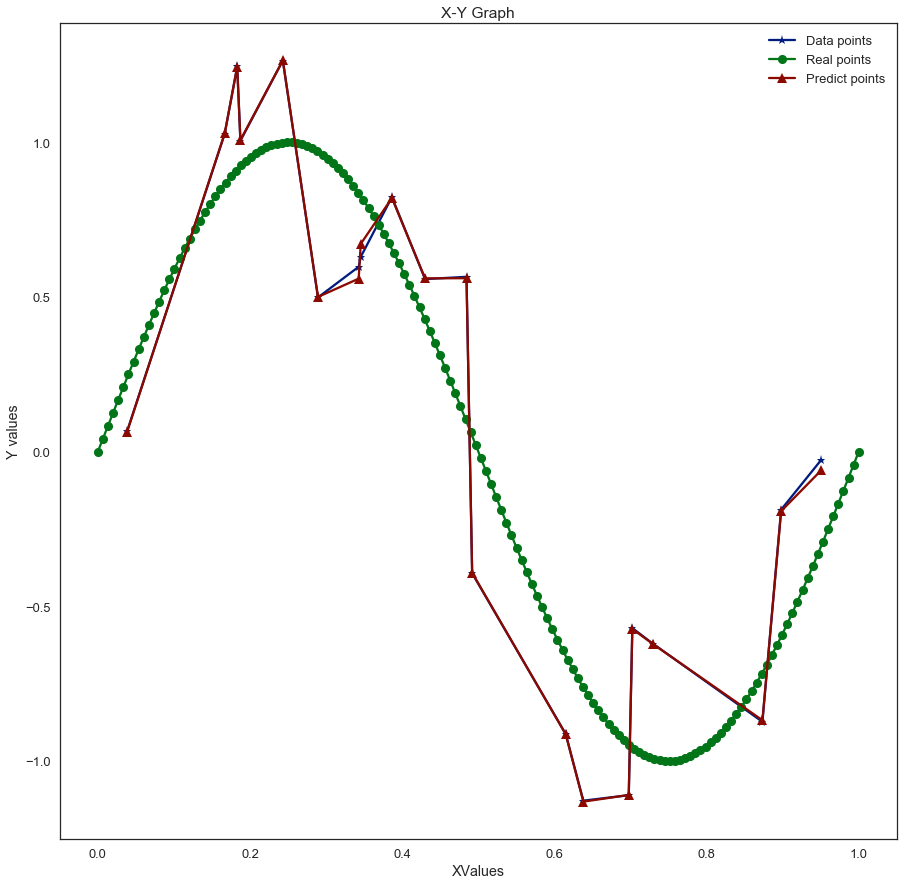

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x_data = data[['x']]
y_data = data['y']
print("X Data :  ",x_data.shape)
print("Y Data :  ",y_data.shape)

degree = 20
pf = PolynomialFeatures(degree)
x_poly = pf.fit_transform(x_data)

LR = LinearRegression()
LR.fit(x_poly,y_data)

y_predict = LR.predict(x_poly)


plt.plot(x_data,y_data,marker="*",label='Data points')
plt.plot(x_train,y_train,marker="o",label='Real points')
plt.plot(x_data,y_predict,marker="^",label='Predict points')
plt.legend()
ax = plt.gca()
ax.set(xlabel='XValues',ylabel='Y values',title='X-Y Graph')
pd.DataFrame(x_poly).head(2)

## Question 3
* Perform the regression on using the data with polynomial features using ridge regression ( αα =0.001) and lasso regression ( αα =0.0001).
* Plot the results, as was done in Question 1.
* Also plot the magnitude of the coefficients obtained from these regressions, and compare them to those obtained from linear regression in the previous question. The linear regression coefficients will likely need a separate plot (or their own y-axis) due to their large magnitude.

What does the comparatively large magnitude of the data tell you about the role of regularization?

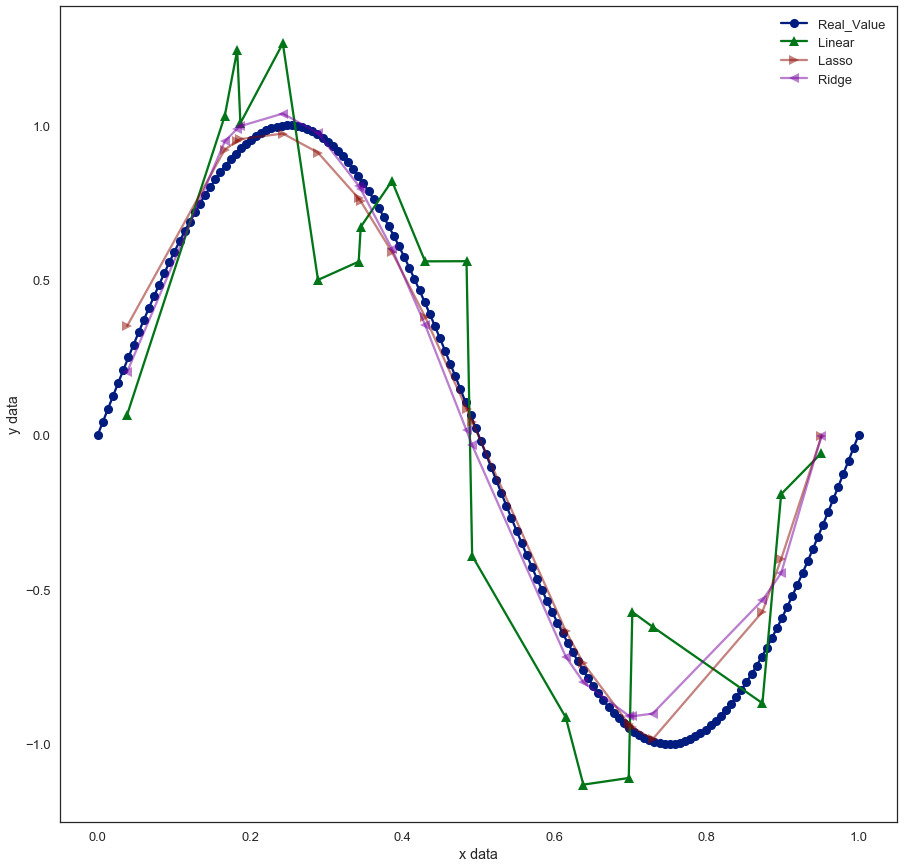

In [4]:
from sklearn.linear_model import Lasso,Ridge,LarsCV,RidgeCV,LassoCV
from sklearn.preprocessing import PolynomialFeatures
import warnings 
warnings.filterwarnings('ignore',module='sklearn')


lassor = Lasso(alpha=.0001)
lassor.fit(x_poly,y_data)
y_predict_lasso = lassor.predict(x_poly)

rr = Ridge(alpha=.0001)
rr.fit(x_poly,y_data)
y_predict_rr = rr.predict(x_poly)


plt.plot(x_train,y_train,marker='o',label='Real_Value')

plt.plot(x_data,y_predict,marker='^',label='Linear')
plt.plot(x_data,y_predict_lasso,marker='>',label='Lasso',alpha=.5)
plt.plot(x_data,y_predict_rr,marker='<',alpha=.5,label='Ridge')

plt.legend(loc='best')
x_poly.shape

ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');

In [5]:
coefficients = pd.DataFrame()
coefficients['lr'] = LR.coef_.ravel()
coefficients['lassor'] = lassor.coef_.ravel()
coefficients['rr'] = rr.coef_.ravel()
coefficients = coefficients.applymap(abs)
coefficients.describe()
LR.coef_.ravel()

array([ -3.78347178e+12,   1.61937119e+07,  -4.66042515e+08,
         7.67985514e+09,  -8.27103331e+10,   6.23382758e+11,
        -3.41638982e+12,   1.38909001e+13,  -4.21454452e+13,
         9.44470036e+13,  -1.50612573e+14,   1.52996558e+14,
        -5.55540673e+13,  -8.90643779e+13,   1.41038999e+14,
        -3.54829920e+13,  -1.16140190e+14,   1.65534653e+14,
        -1.07053967e+14,   3.62118793e+13,  -5.19789240e+12])

[Text(0,0.5,'lasso and ridge')]

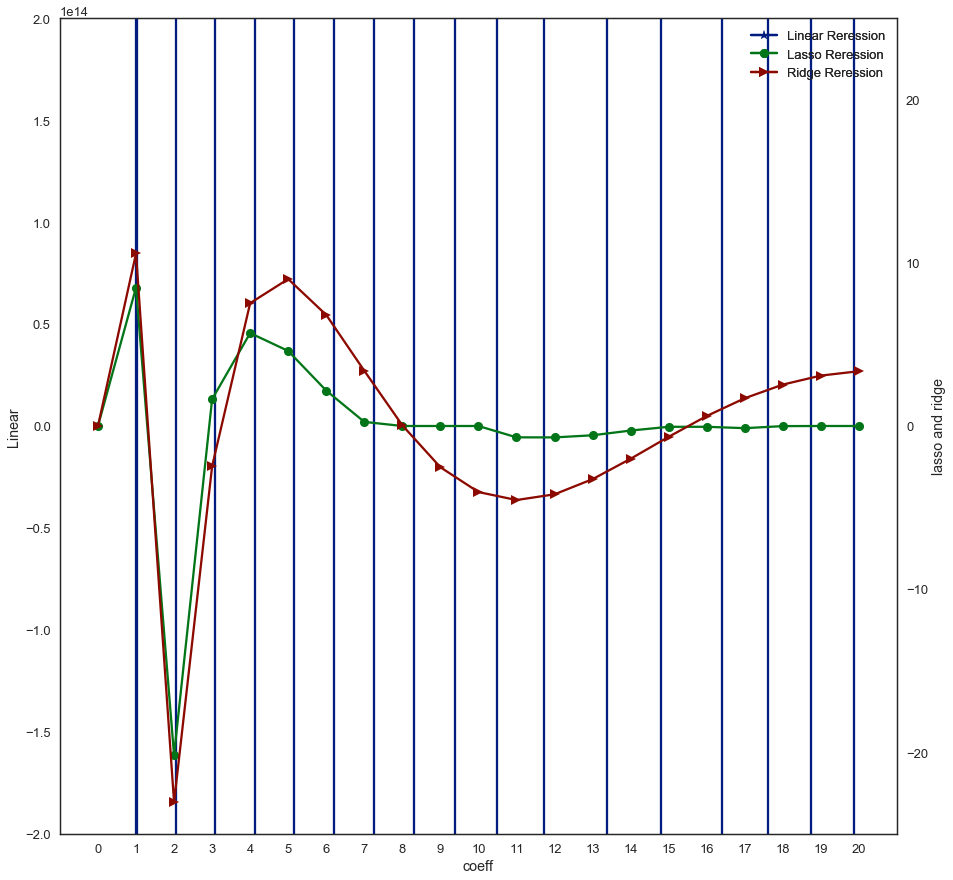

In [6]:
colors = sns.color_palette()

ax1 = plt.axes()
ax2 = ax1.twinx()

plt.plot(LR.coef_.ravel(),color=colors[0],marker='*',label='Linear Reression')
plt.plot(lassor.coef_.ravel(),color=colors[1],marker='o',label='Lasso Reression')
plt.plot(rr.coef_.ravel(),color=colors[2],marker='>',label='Ridge Reression')

ax1.set_ylim(-2e14,2e14)
ax2.set_ylim(-25,25)
plt.legend()

h1,l1 = ax1.get_legend_handles_labels()
h2,l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2,l1+l2)

ax1.set_xticks(range(len(LR.coef_)))
ax1.set(xlabel='coeff',ylabel='Linear')
ax2.set(ylabel='lasso and ridge')


## Question 4

For the remaining questions, we will be working with the [data set](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) from last lesson, which is based on housing prices in Ames, Iowa. There are an extensive number of features--see the exercises from week three for a discussion of these features.

To begin:

* Import the data with Pandas, remove any null values, and one hot encode categoricals. Either Scikit-learn's feature encoders or Pandas `get_dummies` method can be used.
* Split the data into train and test sets. 
* Log transform skewed features. 
* Scaling can be attempted, although it can be interesting to see how well regularization works without scaling features.

In [7]:
import os
import pandas as pd
data_path = ['../data']
file_path = ['Ames_Housing_Sales.csv']
filepath = os.sep.join(data_path + file_path)
data = pd.read_csv(filepath, sep=',')

In [8]:
import numpy as np
ohc_col = data.dtypes[data.dtypes == np.object]
col_list = ohc_col.index.tolist()
col_list[:7]
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


In [9]:
for cols in col_list:
    data[cols] = pd.Categorical(data[cols])

data = pd.get_dummies(data,columns=col_list)

In [10]:
from sklearn.model_selection import train_test_split

label = 'SalePrice'
train, test = train_test_split(data,test_size=.3,random_state=42)



There are a number of columns that have skewed features--a log transformation can be applied to them. Note that this includes the `SalePrice`, our predictor. However, let's keep that one as is.

In [11]:
mask = data.dtypes == np.float
float_cols = data.columns[mask]
skew_limit =.75

skew_vals = train[float_cols].skew()
skew_cols = (skew_vals
            .sort_values(ascending=True)
            .to_frame()
            .rename(columns={0:'skew'})
            .query('abs(skew) >{0}'.format(skew_limit) ))
skew_cols.head()

,skew
2ndFlrSF,0.773655
GarageArea,0.838422
BsmtUnfSF,0.900308
WoodDeckSF,1.334388
GrLivArea,1.455564


Text(0.5,0.98,'Plot of BsmtFinSF1')

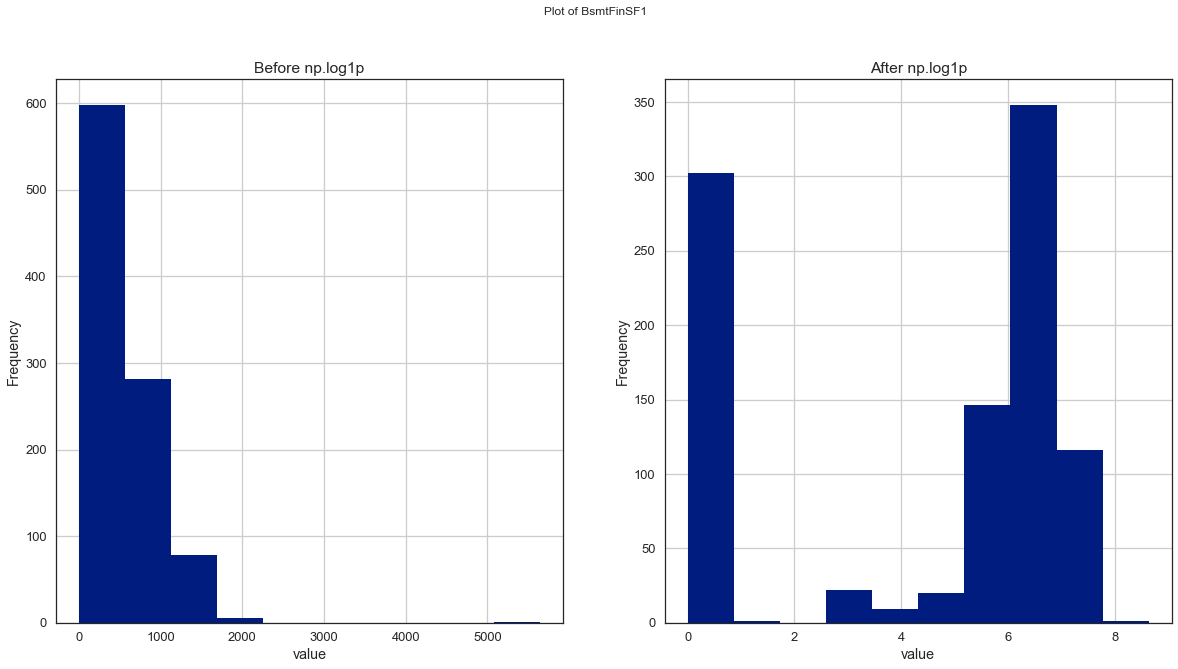

In [12]:
import matplotlib.pyplot as plt
field = 'BsmtFinSF1'
fig,(ax_before,ax_after) = plt.subplots(1,2,figsize=(20,10))

train[field].hist(ax=ax_before)
train[field].apply(np.log1p).hist(ax=ax_after)

ax_before.set(title='Before np.log1p',xlabel='value',ylabel='Frequency')
ax_after.set(title='After np.log1p',xlabel='value',ylabel='Frequency')
fig.suptitle('Plot of {0}'.format(field))

In [13]:
pd.options.mode.chained_assignment = None

for col in skew_cols.index.tolist():
    if col == 'SalePrice':
        continue
    train[col] = np.log1p(train[col])
    test[col] = test[col].apply(np.log1p)


###### Separate features from predictor.

In [14]:
feature_column =  [x for x in train.columns if x!=  label]

x_train = train[feature_column]
y_train = train[label]

x_test = test[feature_column]
y_test = test[label]

## Question 5

* Write a function **`rmse`** that takes in truth and prediction values and returns the root-mean-squared error. Use sklearn's `mean_squared_error`.  


In [100]:
from sklearn.metrics import mean_squared_error

def rmse(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))


* Fit a basic linear regression model
* print the root-mean-squared error for this model
* plot the predicted vs actual sale price based on the model.  

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

LR = LinearRegression().fit(x_train,y_train)
y_pred = LR.predict(x_test)

linear_rmse = rmse(y_test,y_pred)
linear_score = LR.score(x_test,y_test)
linear_score

-14.54808089713242

[(0, 582933.0),
 Text(0,0.5,'Predicted'),
 (0, 582933.0),
 Text(0.5,0,'Actual'),
 Text(0.5,1,'y_test vs y_pred')]

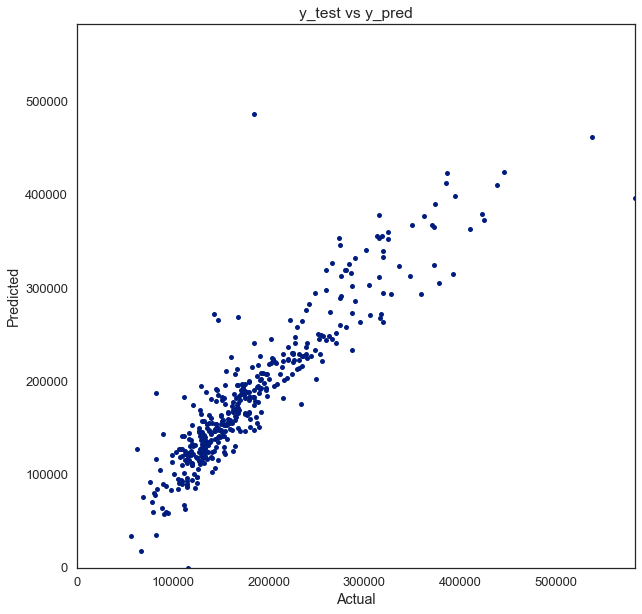

In [104]:
f = plt.figure(figsize=(10,10))
axs = plt.axes()
lim = (0,y_test.max())

axs.plot(y_test,LR.predict(x_test),marker='o',ls=' ', ms=5.0)

axs.set(title='y_test vs y_pred',
      xlabel = 'Actual',
      ylabel = 'Predicted',
      xlim = lim,
      ylim = lim)




## Question 6

Ridge regression uses L2 normalization to reduce the magnitude of the coefficients. This can be helpful in situations where there is high variance. The regularization functions in Scikit-learn each contain versions that have cross-validation built in.

* Fit a regular (non-cross validated) Ridge model to a range of $\alpha$ values and plot the RMSE using the cross validated error function you created above.
* Use $$[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]$$ as the range of alphas.
* Then repeat the fitting of the Ridge models using the range of $\alpha$ values from the prior section. Compare the results.

 Now for the `RidgeCV` method. It's not possible to get the alpha values for the models that weren't selected, unfortunately. The resulting error values and $\alpha$ values are very similar to those obtained above.

In [105]:
from sklearn.linear_model import RidgeCV
alphas =  [0.005,0.05,0.1,0.3,1,3,5,10,21,22,23,28,30,35,80]

ridge_reg = RidgeCV(alphas=alphas,cv=5)
ridge_reg.fit(x_train,y_train)



RidgeCV(alphas=[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 21, 22, 23, 28, 30, 35, 80],
    cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [106]:
print(ridge_reg.alpha_)

10


#### Now alpha best fitted at 22 so trying nearest values to the 22

In [107]:
alphas =  [21,21.5,21.6,21.7,22,22.5,23]

ridge_reg = RidgeCV(alphas=alphas,cv=5)
ridge_reg.fit(x_train,y_train)
ridge_score = ridge_reg.score(x_test,y_test)
ridge_rmse = rmse(y_test,ridge_reg.predict(x_test))


print(ridge_reg.alpha_)

21


### Question 7


Much like the `RidgeCV` function, there is also a `LassoCV` function that uses an L1 regularization function and cross-validation. L1 regularization will selectively shrink some coefficients, effectively performing feature elimination.

The `LassoCV` function does not allow the scoring function to be set. However, the custom error function (`rmse`) created above can be used to evaluate the error on the final model.

Similarly, there is also an elastic net function with cross validation, `ElasticNetCV`, which is a combination of L2 and L1 regularization.

* Fit a Lasso model using cross validation and determine the optimum value for $\alpha$ and the RMSE using the function created above. Note that the magnitude of $\alpha$ may be different from the Ridge model.
* Repeat this with the Elastic net model.
* Compare the results via table and/or plot.


In [108]:
from sklearn.linear_model import LassoCV,ElasticNetCV
alphas2 = np.linspace(0,300,10)

lasso_reg = LassoCV(alphas=alphas2,cv=4,max_iter=500).fit(x_train,y_train)
print(lasso_reg.alpha_)
lasso_score = lasso_reg.score(x_test,y_test)
lasso_rmse = rmse(y_test,lasso_reg.predict(x_test))



# regresion line best fitted at alpha = 200

200.0


Model using Elastic Net

In [109]:
alpha3= np.linspace(-100,100,10)

elsatic_re = ElasticNetCV(alphas=alpha3, l1_ratio= .989,cv=5,max_iter=500).fit(x_train,y_train)
print(elsatic_re.alpha_)

elastic_score= elsatic_re.score(x_test,y_test)
e_rmse = rmse(y_test,elsatic_re.predict(x_test))
# regresion line best fitted at alpha = 200

11.1111111111


In [111]:
scores = [linear_score,ridge_score,lasso_score,elastic_score]
rmseerror = [linear_rmse,ridge_rmse,lasso_rmse,e_rmse]
labels = ['Linear','Ridge','Lasso','ElasticNet']
columns = ['R2_score','RMSE']

scores = pd.DataFrame(scores)
rmseerror = pd.DataFrame(rmseerror)

reg_eval_df = pd.concat([scores,rmseerror],axis=1) 
reg_eval_df.columns = columns
reg_eval_df.index = labels
reg_eval_df

,R2_score,RMSE
Linear,-14.548081,306369.683423
Ridge,0.829305,32100.983296
Lasso,0.806187,34205.706579
ElasticNet,0.822257,32756.988245


[Text(0,0.5,'Predicted Y'),
 Text(0.5,0,'Actual Y'),
 Text(0.5,1,'Linear regression result')]

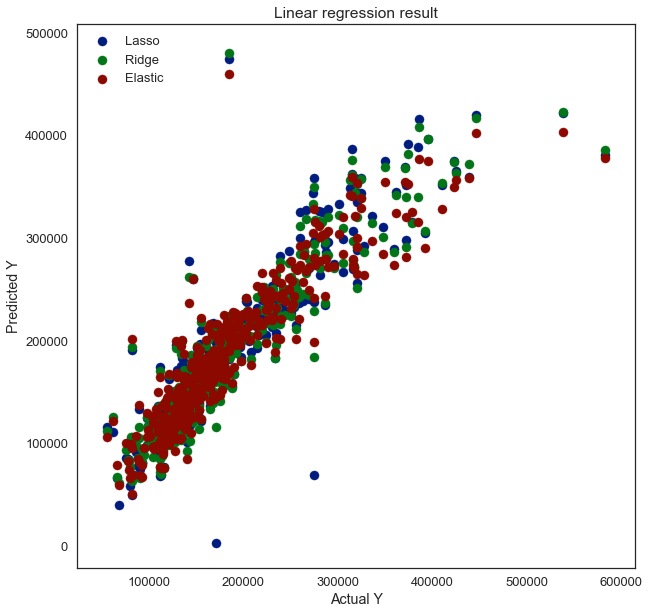

In [125]:
label = ['Lasso','Ridge','Elastic']
models = [lasso_reg,ridge_reg,elsatic_re]

fig = plt.figure(figsize=(10,10))
ax = plt.axes()

for lab,mod in zip(label,models):
    ax.scatter(y_test,mod.predict(x_test),label = lab)
plt.legend(loc='upper left')

ax.set(xlabel='Actual Y',ylabel='Predicted Y',title='Linear regression result')

## Question 8

Let's explore Stochastic gradient descent in this exercise.  
Recall that Linear models in general are sensitive to scaling.
However, SGD is *very* sensitive to scaling.  
Moreover, a high value of learning rate can cause the algorithm to diverge, whereas a too low value may take too long to converge.

* Fit a stochastic gradient descent model without a regularization penalty (the relevant parameter is `penalty`).
* Now fit stochastic gradient descent models with each of the three penalties (L2, L1, Elastic Net) using the parameter values determined by cross validation above. 
* Do not scale the data before fitting the model.  
* Compare the results to those obtained without using stochastic gradient descent.

In [135]:
from sklearn.linear_model import SGDRegressor

model_parameters = {
          'Linear':{'penalty':'None'},
          'Lasso':{'penalty':'l1','alpha':lasso_reg.alpha_},
          'Ridge':{'penalty':'l2','alpha':ridge_reg.alpha_},
          'Elastic':{'penalty':'elasticnet','alpha':elsatic_re.alpha_,'l1_ratio':elsatic_re.l1_ratio_}
         }

model_scores = {}
rmse_error = {}
for lab,params in model_parameters.items():
    sgd = SGDRegressor(eta0=1e-7,**params)
    sgd.fit(x_train,y_train)
    rmse_error[lab] = rmse(y_test,sgd.predict(x_test))
    model_scores[lab] = sgd.score(x_test,y_test)

sgd_mat = pd.DataFrame([rmse_error,model_scores]).T
sgd_mat.columns = columns
sgd_mat

,R2_score,RMSE
Elastic,76103.165728,0.040620
Lasso,79011.584901,-0.034110
Linear,81805.328363,-0.108532
Ridge,77571.413605,0.003245


Text(0.5,0.98,'SGD Rgression for different models')

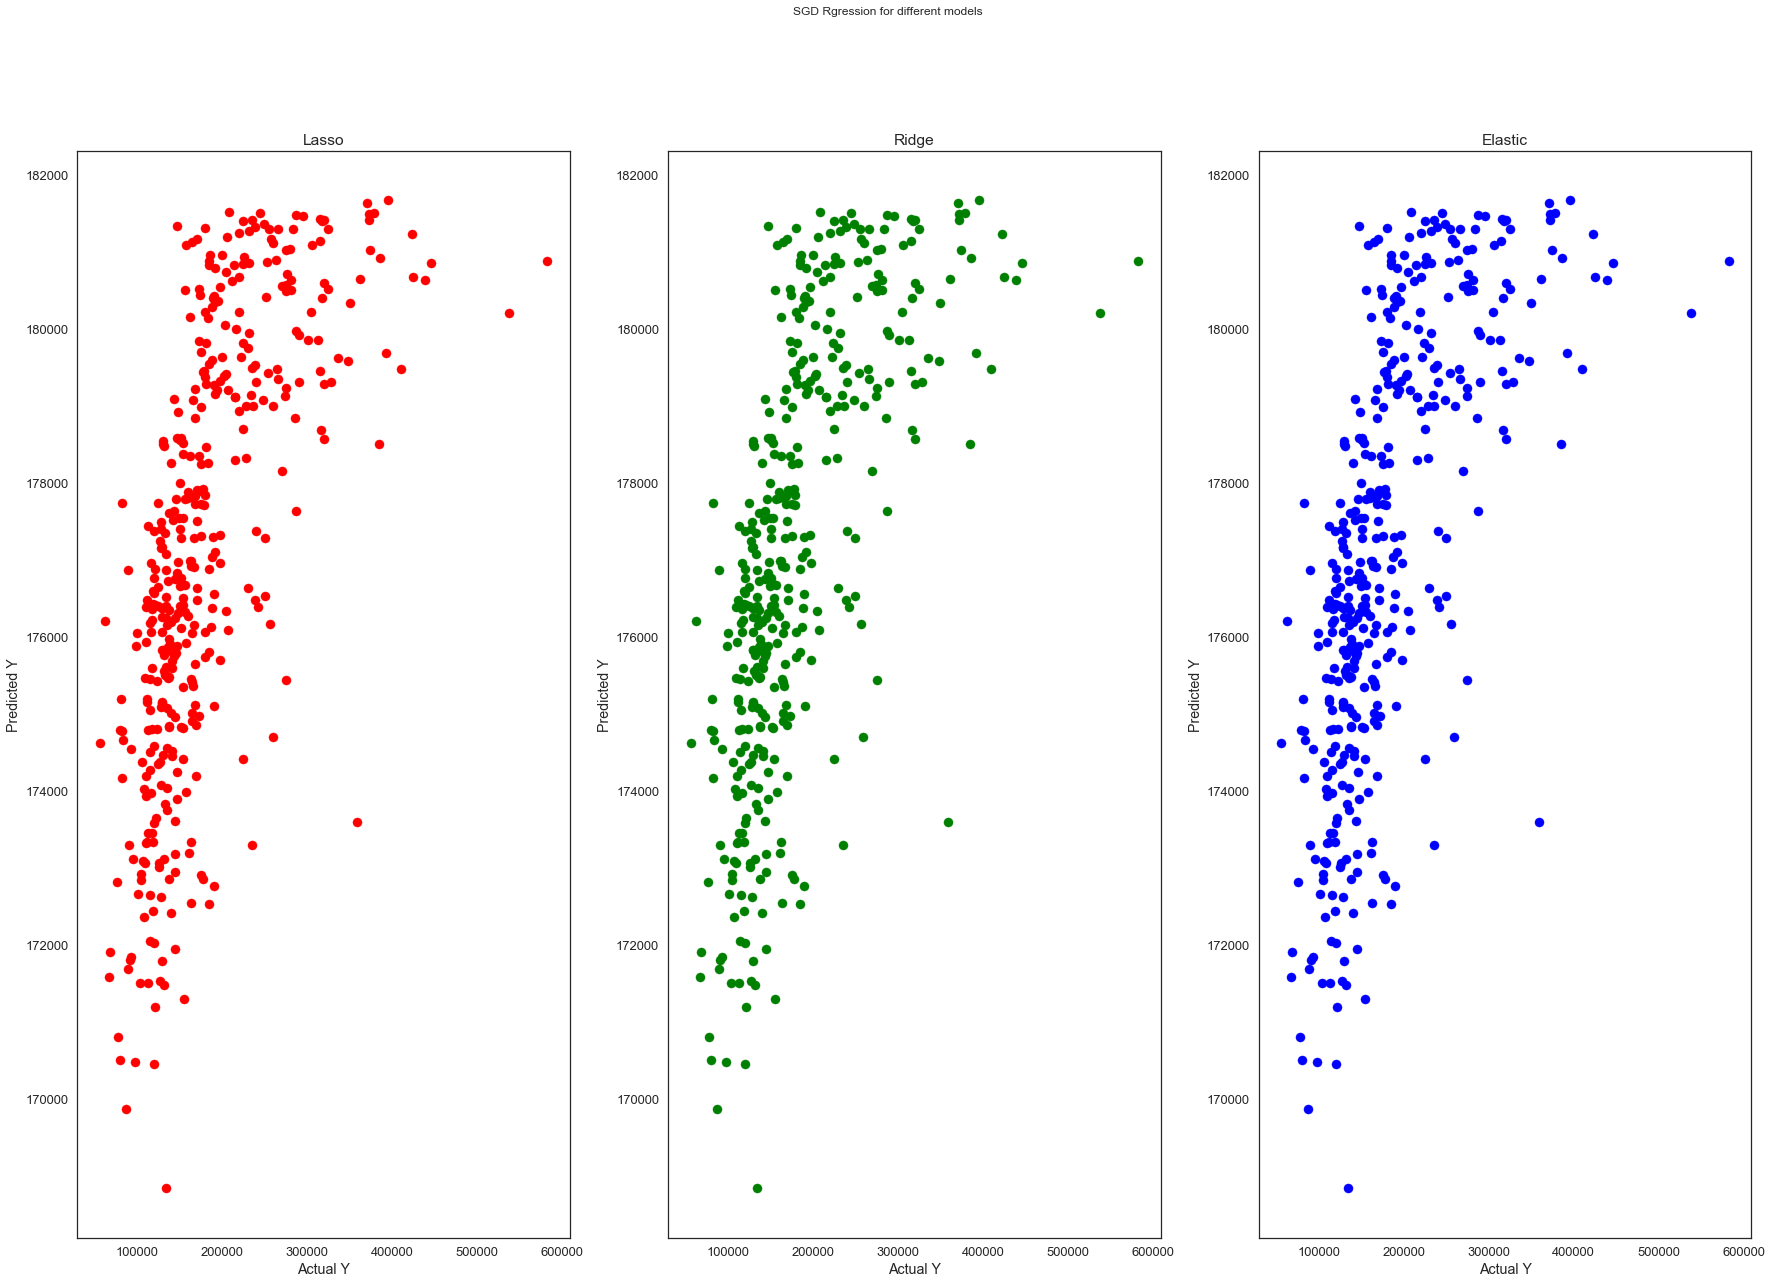

In [154]:
label = ['Lasso','Ridge','Elastic']
colors = ['red','green','blue']

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(30,20))

axes = [ax1,ax2,ax3]
for lab,col,a in zip(label,colors,axes):
   a.scatter(y_test,sgd.predict(x_test),c=col)
   a.set(xlabel='Actual Y',ylabel='Predicted Y',title=lab)
fig.suptitle("SGD Rgression for different models")




##### Point of all three linear reg model are overlapping to each other